# Intro to Probabilsitic Programming (PyMC)

In [1]:
%pip install pytensor pymc

In [2]:
import numpy as np
# Assume N trials and K successes out of those trials
# Change these numbers to see how the posterior plot changes
#trials = 500; successes = 250

np.random.seed()

p_true = 0.35

# Number of tosses
trials = 100  # Replace with your desired number of tosses

# Simulating N coin tosses
successes = np.random.binomial(trials, p_true)

print(f"N tosses: {trials}, heads: {successes}")

N tosses: 100, heads: 37


In [3]:
import pymc as pm

# Set up model context
with pm.Model() as coin_flip_model:
    # Probability p of success we want to estimate
    # and assign Beta prior
    p = pm.Beta("p", alpha=1, beta=1)

    # Define likelihood
    obs = pm.Binomial("obs", p=p, n=trials,
        observed=successes,
    )

    # Hit Inference Button
    idata = pm.sample()


* The **with** statement provides several advantages

  1. Context Management: The with statement is used for managing resources and is particularly useful in scenarios where setup and cleanup actions are needed, such as opening and closing files. In PyMC, it's used for context management of the model.

  2. Automatic Model Association: When you define a PyMC model inside a with block, any distributions you define inside the block are automatically associated with that model. This includes both priors (like pm.Beta) and likelihoods (like pm.Binomial in your example). Without the with block, you would have to manually associate each distribution with the model.

  3. Readability and Clarity: The with block clearly demarcates where the model definition starts and ends. This enhances code readability and makes it easier to understand the model's scope.

  4. Error Handling: It helps in handling exceptions in a clean way. If an error occurs within the with block, PyMC can perform necessary cleanup, such as releasing resources.

  5. Model Sampling within Context: In your example, pm.sample() is called within the with block. This ensures that the sampling is done using the correct model context. It helps in keeping your model-building and sampling process organized and ensures that the sampling is done on the model you've just defined.

---

### pymc.sample

**pymc.sample**(draws=1000, step=None, init='auto', n_init=200000, initvals=None, trace=None, chain_idx=0, chains=None, cores=None, tune=1000, progressbar=True, model=None, random_seed=None, discard_tuned_samples=True, compute_convergence_checks=True, callback=None, jitter_max_retries=10, *, return_inferencedata=True, idata_kwargs=None, mp_ctx=None, **kwargs) [link text](https://www.pymc.io/projects/docs/en/v4.0.1/api/generated/pymc.sample.html#pymc.sample)

Some kwargs to highlight in pymc.sample:

* *draws*: int - The number of samples to draw. Defaults to 1000.

* *init*: str - Initialization method to use for auto-assigned NUTS samplers.

* *chains*: int - The number of chains to sample. Running independent chains is important for some convergence statistics and can also reveal multiple modes in the posterior. If None, then set to either cores or 2, whichever is larger.

* *cores*: int - The number of chains to run in parallel. If None, set to the number of CPUs in the system, but at most 4.

* *tune*: int -  Number of iterations to tune, defaults to 1000. Samplers adjust the step sizes, scalings or similar during tuning. Tuning samples will be drawn in addition to the number specified in the draws argument, and will be discarded unless discard_tuned_samples is set to False.

* *return_inferencedata*: bool - With PyMC the *return_inferencedata=True* kwarg makes the sample function return an arviz.InferenceData object instead of a MultiTrace. InferenceData has many advantages, compared to a MultiTrace: For example it can be saved/loaded from a file, and can also carry additional (meta)data such as date/version, or posterior predictive distributions.
---




## Exploring the model and the obtained chains

In [4]:
coin_flip_model

In [5]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [6]:
idata['posterior']

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    p        (chain, draw) float64 0.3979 0.3495 0.3326 ... 0.3132 0.2546 0.3243
Attributes:
    created_at:                 2024-02-06T18:53:54.637632
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.7.2
    sampling_time:              2.6296799182891846
    tuning_steps:               1000

In [7]:
idata['posterior']['chain']

<xarray.DataArray 'chain' (chain: 2)>
array([0, 1])
Coordinates:
  * chain    (chain) int64 0 1

In [8]:
res = idata['posterior']['p'][0]
print(res)

<xarray.DataArray 'p' (draw: 1000)>
array([0.39791082, 0.3494632 , 0.33256615, 0.40314944, 0.40059653,
       0.3878399 , 0.34229813, 0.36189639, 0.31121252, 0.27995477,
       0.49316945, 0.42271801, 0.38401377, 0.46545143, 0.36714796,
       0.3889227 , 0.41378489, 0.41378489, 0.41026717, 0.29152265,
       0.31509799, 0.43810644, 0.43810644, 0.47508645, 0.39709019,
       0.39151385, 0.43642923, 0.38147158, 0.38147158, 0.37799307,
       0.40189086, 0.37746773, 0.3984474 , 0.34185009, 0.3463228 ,
       0.3463228 , 0.38566153, 0.3935633 , 0.38761045, 0.37757743,
       0.42837251, 0.42673173, 0.44981408, 0.46127351, 0.38585749,
       0.43315855, 0.40129597, 0.43804182, 0.46912801, 0.39509959,
       0.39509959, 0.46834022, 0.38719567, 0.38719567, 0.38719567,
       0.38750057, 0.38750057, 0.35005588, 0.34343202, 0.4055779 ,
       0.33149381, 0.42594569, 0.45596648, 0.38572135, 0.38572135,
       0.37308262, 0.37308262, 0.37308262, 0.446552  , 0.38262972,
       0.44481003, 0.43904

## Arviz - Exploratory analysis of Bayesian models

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


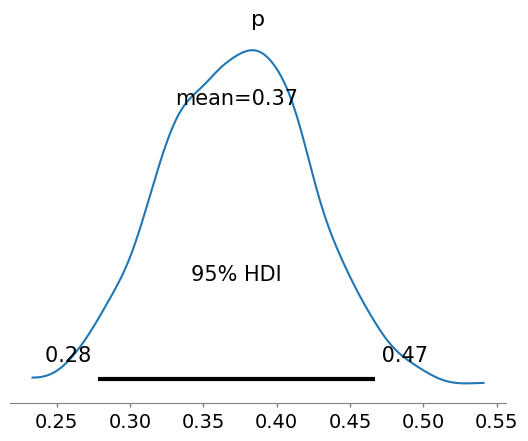

<Axes: title={'center': 'p'}>

In [9]:
import arviz as az

az.plot_posterior(idata, show=True, hdi_prob=0.95)

### ROPE: Region Of Practical Equivalence

A range of parameter values around the "null value", that is good enough for practical purposes [link text](https://journals.sagepub.com/doi/10.1177/2515245918771304)



<!-- ![images_large_10.1177_2515245918771304-fig1.jpeg](https://journals.sagepub.com/cms/10.1177/2515245918771304/asset/images/large/10.1177_2515245918771304-fig1.jpeg) -->


<img src="https://journals.sagepub.com/cms/10.1177/2515245918771304/asset/images/large/10.1177_2515245918771304-fig1.jpeg" width="700" alt="Image Description"/>







<Axes: title={'center': 'p'}>

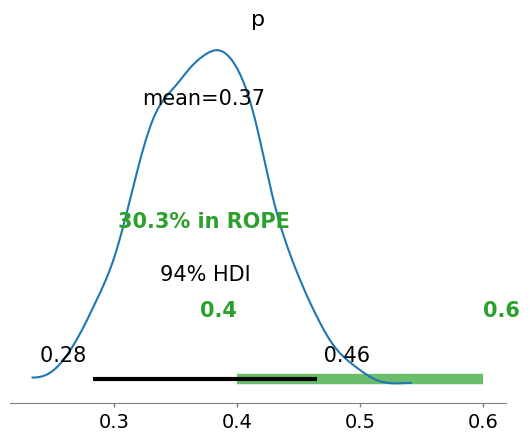

In [10]:
# ROPE: Region Of Practical Equivalence
az.plot_posterior(idata, rope=[0.4, .6])

### Plotting the Posterior

array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

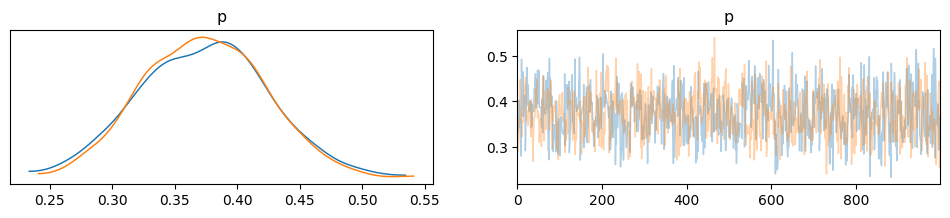

In [11]:
az.plot_trace(idata, combined = False, compact=False)

Depending on the number of chains (N), you have N curves.

The plots on the left are obtained from Kernel Density Estimation (KDE) of the corresponding histograms, while the plots on the right are the sampled values from each chain.

You should compare these curves with those obtained analytically in the previous lecture.

### Summarizing the Posterior

In [12]:
#it returns a Pandas dataframe
az.summary(idata)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.373,0.049,0.283,0.465,0.002,0.001,799.0,1203.0,1.0


That’s the mean from all the chains… HDI are simple to understand at this point. The other metrics will become more clear in the following lectures, but for now know that they are used to interpret the results of a Bayesian inference.

**HPD**: High Posterior Density; **HDI**: is the highest density interval. Another way of summarizing a distribution, which we will use often, abbreviated HDI. The HDI indicates which points of a distribution are most credible, and which cover most of the distribution.

They are often used as synonyms in the legends of the plots.

**Geeks**
If you want to learn more:

* *mcse*: Monte Carlo Standard Error

* *ess*: effective-sample size

* *ess_bulk*: useful measure for sampling efficiency in the bulk of the distribution. The rule of thumb for ess_bulk is for this value to be greater than 100 per chain on average. Since we ran N chains, we need ess_bulk to be greater than N*100 for each parameter.

* *ess_tail*: compute a tail effective sample size estimate for a single variable. The rule of thumb for this value is also to be greater than 100 per chain on average.

* *r_hat*: diagnostic tests for lack of convergence by comparing the variance between multiple chains to the variance within each chain. converges to unity when each of the traces is a sample from the target posterior. Values greater than one indicate that one or more chains have not yet converged.

## So, is the coin fair? Posterior-based decisions

Strictly speaking, a fair coin θ=0.5. But the probability of observing exactly 0.5 is practcally 0. We can relax this definition of fairness to a Region of Practical Equivalence (ROPE), say [0.45,0.55] (it depends on your expectations and prior knowledge and it is always context-dependent).

There are three scenarios:

* the ROPE does not overlap with the HDI; the coin is not fair

* the ROPE contains the entire HDI; the coin is fair

* the ROPE partially overlaps with HDI; we cannot make any conclusions

Unlike a frequentist approach, Bayesian inference is not based on statistical significance, where effects are tested against “zero”. Indeed, the Bayesian framework offers a probabilistic view of the parameters, allowing assessment of the uncertainty related to them. Thus, rather than concluding that an effect is present when it simply differs from zero, we would conclude that the probability of being outside a specific range that can be considered as “practically no effect” (i.e., a negligible magnitude) is sufficient. This range is called the region of practical equivalence (ROPE).

Therefore, ***the idea underlining ROPE is to let the user define an area around the null value enclosing values that are equivalent to the null value for practical purposes***

<Axes: title={'center': 'p'}>

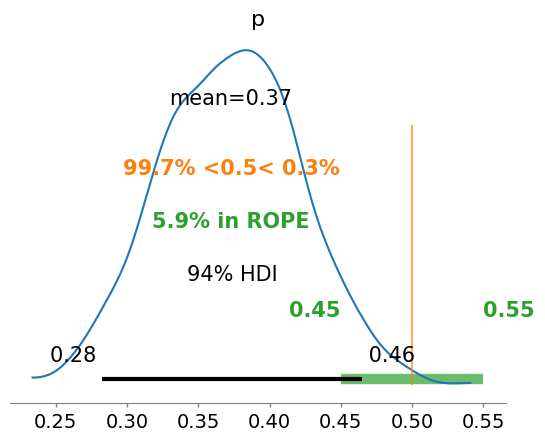

In [13]:
# you can set reference values if useful for illustrative purposes
az.plot_posterior(idata, ref_val=0.5, rope=[0.45,0.55])


## Will you get the "same" distribution if you collect and update your beliefs sequentially?

In [14]:
indices_to_set = np.random.choice(trials, successes, replace=False)
data_coins = np.zeros(trials, dtype=int)
data_coins[indices_to_set]=1
print(data_coins)

[0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0]


In [15]:
with pm.Model() as model_bernoulli: #everything inside the with-block will add to our_first_model
    # prior
    θ = pm.Beta('θ', alpha=1., beta=1.)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data_coins) #using observed data tells PyMC this is the likelihood

    #"The Inference Button"
    idata = pm.sample()

<Axes: title={'center': 'θ'}>

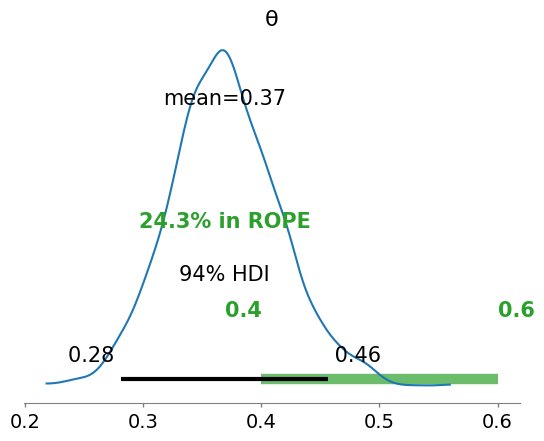

In [16]:
az.plot_posterior(idata, rope=[0.4, .6])

## How to update beliefs with new observations?

In [17]:
# Extract posterior statistics
posterior_mean = idata.posterior['θ'].mean().values
posterior_sd = idata.posterior['θ'].std().values

print(f"posterior mu: {posterior_mean}, sigma: {posterior_sd}")

# New observations
new_observations = [1, 1]  # For example, two new heads

posterior mu: 0.36904564460269523, sigma: 0.04612827506671942


In [18]:
# Updated model
with pm.Model() as model_updated:
    # Using the posterior mean and sd as new prior
    θ_new = pm.Normal('θ_new', mu=posterior_mean, sigma=posterior_sd)

    # Add new observations to the likelihood
    y_new = pm.Bernoulli('y_new', p=θ_new, observed=new_observations)

    idata_updated = pm.sample()

<Axes: title={'center': 'θ_new'}>

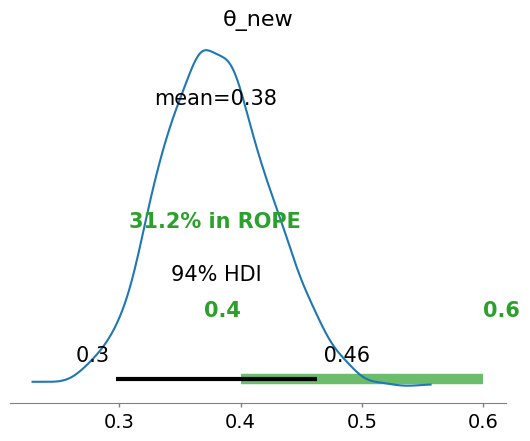

In [19]:
az.plot_posterior(idata_updated, rope=[0.4, .6])

Please notice that the prior we utilized is a normal distrbution, that can give values of the parameter $\theta$ (a probability) negative.
There are ways to "prevent" that, as we will learn in the next lectures.